In [1]:
import pandas as pd

In [4]:
data=pd.read_csv(r"/content/dataset1.csv")

In [5]:
data=data[["Wind Speed"]]

In [6]:
values=data.values

In [7]:
values

array([[1.3],
       [1.2],
       [1.2],
       ...,
       [1.3],
       [1.3],
       [1.3]])

In [8]:
len(data)

52560

In [9]:
#subtrcating last 3 values to make training and testing part
train=data.iloc[:52558]
test=data.iloc[-3:]

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler=MinMaxScaler()

In [12]:
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [13]:
scaled_train[:10]

array([[0.14444444],
       [0.13333333],
       [0.13333333],
       [0.13333333],
       [0.13333333],
       [0.12222222],
       [0.12222222],
       [0.12222222],
       [0.12222222],
       [0.11111111]])

In [14]:
scaled_test

array([[0.14444444],
       [0.14444444],
       [0.14444444]])

# Data Preprocessing

In [15]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Preparing input and output features

In [16]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [17]:
n_input=3
n_features=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [18]:
X,y=generator[0]

In [19]:
#Given the array of this 3 array
X.flatten()

array([0.14444444, 0.13333333, 0.13333333])

In [20]:
#predict this y
y

array([[0.13333333]])

In [21]:
X.shape

(1, 3, 1)

In [22]:
model=Sequential()
model.add(LSTM(100,activation="relu",input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.fit(generator,epochs=50)

Epoch 1/50
52555/52555 [==============================] - 239s 5ms/step - loss: 1.8967e-04
Epoch 2/50
52555/52555 [==============================] - 236s 4ms/step - loss: 6.4026e-05
Epoch 3/50
52555/52555 [==============================] - 239s 5ms/step - loss: 5.9110e-05
Epoch 4/50
52555/52555 [==============================] - 239s 5ms/step - loss: 5.7445e-05
Epoch 5/50
52555/52555 [==============================] - 236s 4ms/step - loss: 5.6268e-05
Epoch 6/50
52555/52555 [==============================] - 235s 4ms/step - loss: 5.5119e-05
Epoch 7/50
52555/52555 [==============================] - 238s 5ms/step - loss: 5.4740e-05
Epoch 8/50
52555/52555 [==============================] - 239s 5ms/step - loss: 5.3981e-05
Epoch 9/50
52555/52555 [==============================] - 236s 4ms/step - loss: 5.3522e-05
Epoch 10/50
52555/52555 [==============================] - 233s 4ms/step - loss: 5.3142e-05
Epoch 11/50
52555/52555 [==============================] - 230s 4ms/step - loss: 5.2704e-

In [27]:
loss_per_epoch = model.history.history["loss"]


In [28]:
loss_per_epoch

[0.00018966513744089752,
 6.40259386273101e-05,
 5.910962863708846e-05,
 5.744459485867992e-05,
 5.6267530453624204e-05,
 5.511860945262015e-05,
 5.473979763337411e-05,
 5.3980707889422774e-05,
 5.3521765948971733e-05,
 5.3142051910981536e-05,
 5.270391557132825e-05,
 5.237376899458468e-05,
 5.189164585317485e-05,
 5.1733411964960396e-05,
 5.145712930243462e-05,
 5.131294165039435e-05,
 5.113660517963581e-05,
 5.121847061673179e-05,
 5.099286136101e-05,
 5.055598376202397e-05,
 5.078916365164332e-05,
 5.032082481193356e-05,
 5.045071884524077e-05,
 5.038386007072404e-05,
 5.0644335715333e-05,
 5.045735451858491e-05,
 5.0216673116665334e-05,
 5.030607644584961e-05,
 4.980624362360686e-05,
 5.008964581065811e-05,
 5.0066490075550973e-05,
 4.9698312068358064e-05,
 4.986941712559201e-05,
 4.969593646819703e-05,
 4.949349749949761e-05,
 4.944543616147712e-05,
 4.944348256685771e-05,
 4.9352685891790316e-05,
 4.9421123549109325e-05,
 4.942579471389763e-05,
 4.9477865104563534e-05,
 4.9196969

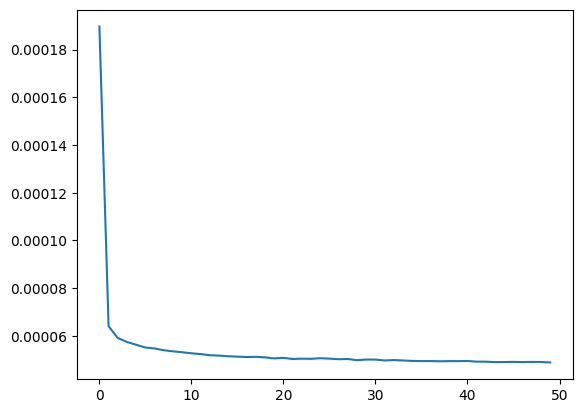

In [30]:
import matplotlib.pyplot as plt
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [39]:
#loss has been decreasing
#last 3 value
last_train_batch=scaled_train[-3:]

In [40]:
last_train_batch

array([[0.14444444],
       [0.14444444],
       [0.14444444]])

In [41]:
last_train_batch=last_train_batch.reshape((1,n_input,n_features))

In [42]:
last_train_batch

array([[[0.14444444],
        [0.14444444],
        [0.14444444]]])

In [44]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 469ms/step


array([[0.14522937]], dtype=float32)

In [45]:
scaled_test[0]

array([0.14444444])

In [47]:
#actual is 0.1444 and model prediction is 0.1452

In [49]:
tes_predictions=[]
first_eval_batch=scaled_train[-n_input:]
current_batch=first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):
  #get the prediction value for first batch
  current_pred=model.predict(current_batch)[0]

  #append the predictions into the array
  tes_predictions.append(current_pred)

  #use the prediction to update the batch and remove the first value
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 38ms/step


In [50]:
tes_predictions

[array([0.14522937], dtype=float32),
 array([0.14622922], dtype=float32),
 array([0.14755736], dtype=float32)]

In [51]:
current_batch

array([[[0.14522937],
        [0.14622922],
        [0.14755736]]])

In [52]:
current_pred

array([0.14755736], dtype=float32)

In [53]:
#converting back into original scale
true_predictions=scaler.inverse_transform(tes_predictions)

In [54]:
true_predictions

array([[1.30706432],
       [1.316063  ],
       [1.32801627]])

In [55]:
test["predictions"]=true_predictions

<ipython-input-55-28db28758c71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predictions"]=true_predictions


In [56]:
test

,Wind Speed,predictions
52557,1.3,1.307064
52558,1.3,1.316063
52559,1.3,1.328016


<Axes: >

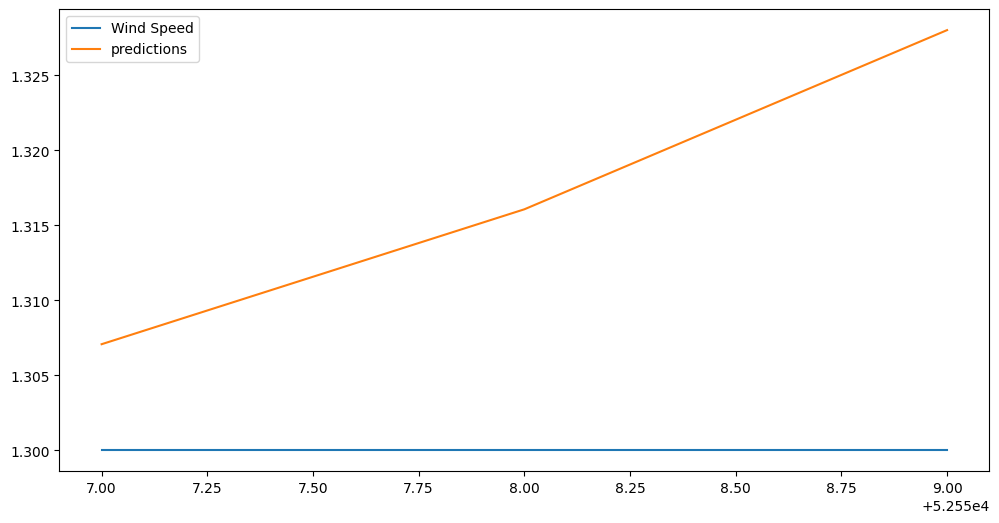

In [57]:
test.plot(figsize=(12,6))

In [58]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test["predictions"],test["Wind Speed"]))

In [59]:
rmse

0.019086084641875452